# Data Science for Construction, Architecture and Engineering
### Week 5 - Introduction to Machine Learning
## Exercise Set 5.2 - Introduction to ML - Regression

This exercise is related to the second half of Week 5 videos. Using the same data (Project Building Data Genome) and packages (sklearn, matplotlib) as in the videos, the following tasks about regression.

There is an introduction video available to explain the process of using this exercise video.

The developers of this exercise are Ananya Joshi, a Fulbright Scholar to Singapore for 2019-2020 and Mahmoud Abdelrahman, a Ph.D. student at NUS and a teaching assistant of this course.


#### Setup the environment

Let's set up the environment that is similar to the colab notebooks from the videos and read the data first:

In [1]:
#import packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib

np.random.seed = 0

In [2]:
#import machine learning modules
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime
import seaborn as sns

In [3]:
#mount the drive
# from google.colab import drive
# drive.mount('/content/gdrive')
# Change directory location (hint: chdir)
# os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/Week 3 - Construction - Pandas Fundamentals/")

## Exercise 05.2.1 - Preprocessing Data For Regression

### Preprocessing weather data:
In the first part of this exercise, we'd like you to load the `weahther0.csv` file from the Week 3 BDG data (drive mounted already). Then you need to resample the data hourly, and extract only the `'TemperatureC'` as our feature.

Feature name | Feature type
--- | ---
TemperatureC | numerical (float)

Next you are asked to extract additional features such as hours of the day, and day of the week to enhance our prediction model. 

Feature name | Feature type
--- | ---
Hour_of_the_day | categorical 
Day_of_the_week | categorical



**Hint1:** There are some [outliers](https://en.wikipedia.org/wiki/Outlier) that need to be removed first -- We can boxplot the data to figure out these outliers as follows:

`weather_hourly[['TemperatureC']].boxplot()`

**Hint2:** [Categorical data](https://www.kaggle.com/tags/categorical-data) are observations that fall into discrete categories. For example: days of the week, months of the year, climate seasons, gender and so on. To make use of such data type in Machine Learning, each category should be first [encoded](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c).

**Hint3:** Dummify the variables. 


In [4]:
# YOUR CODE HERE -- you can use the comments below as a guide to help you stage the parts of the solution
#load the weather file and parse dates
df = pd.read_csv("weather0.csv", parse_dates=['timestamp'],index_col=['timestamp'])

# Extract only the 'TemperatureC' column

# Check for outliers -- see Hint 1


In [5]:
df

,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees
timestamp,,,,,,,,,,,,,
2015-01-01 00:51:00,12:51 AM,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,NaN,NaN,NaN,Mostly Cloudy,300
2015-01-01 01:47:00,1:47 AM,3.0,-1.0,75.0,1016.5,16.1,WNW,5.6,NaN,NaN,NaN,Mostly Cloudy,300
2015-01-01 01:51:00,1:51 AM,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,NaN,NaN,NaN,Mostly Cloudy,300
2015-01-01 02:51:00,2:51 AM,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,NaN,NaN,NaN,Scattered Clouds,320
2015-01-01 03:51:00,3:51 AM,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,NaN,NaN,NaN,Partly Cloudy,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:51:00,7:51 PM,12.2,-6.1,28.0,1016.6,16.1,West,11.1,NaN,NaN,NaN,Clear,280
2015-12-31 20:51:00,8:51 PM,11.7,-6.7,27.0,1017.0,16.1,West,11.1,NaN,NaN,NaN,Partly Cloudy,270
2015-12-31 21:51:00,9:51 PM,10.0,-6.7,31.0,1017.2,16.1,West,5.6,NaN,NaN,NaN,Clear,260


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8999 entries, 2015-01-01 00:51:00 to 2015-12-31 23:51:00
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TimeMST                8999 non-null   object 
 1   TemperatureC           8999 non-null   float64
 2   Dew PointC             8999 non-null   float64
 3   Humidity               8990 non-null   float64
 4   Sea Level PressurehPa  8999 non-null   float64
 5   VisibilityKm           8999 non-null   float64
 6   Wind Direction         8999 non-null   object 
 7   Wind SpeedKm/h         8999 non-null   object 
 8   Gust SpeedKm/h         6370 non-null   object 
 9   Precipitationmm        443 non-null    float64
 10  Events                 330 non-null    object 
 11  Conditions             8999 non-null   object 
 12  WindDirDegrees         8999 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 984.3+ KB


In [7]:
df.describe()

,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Precipitationmm,WindDirDegrees
count,8999.000000,8999.000000,8990.000000,8999.000000,8999.000000,443.000000,8999.000000
mean,14.744705,-4.294922,35.108676,1011.341182,3.680398,0.034379,140.644516
std,316.995945,316.353832,20.269304,4.899539,349.952158,0.081561,106.330864
min,-9999.000000,-9999.000000,4.000000,997.200000,-9999.000000,0.000000,0.000000
25%,17.200000,-0.600000,20.000000,1007.800000,16.100000,0.000000,70.000000
50%,25.000000,5.600000,31.000000,1010.600000,16.100000,0.000000,120.000000
75%,32.200000,12.200000,46.000000,1014.400000,16.100000,0.030000,240.000000
max,50.000000,23.300000,100.000000,1029.600000,16.100000,0.580000,360.000000


In [8]:
df['Hour'] = df.index.hour

In [9]:
df

,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,Hour
timestamp,,,,,,,,,,,,,,
2015-01-01 00:51:00,12:51 AM,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,NaN,NaN,NaN,Mostly Cloudy,300,0
2015-01-01 01:47:00,1:47 AM,3.0,-1.0,75.0,1016.5,16.1,WNW,5.6,NaN,NaN,NaN,Mostly Cloudy,300,1
2015-01-01 01:51:00,1:51 AM,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,NaN,NaN,NaN,Mostly Cloudy,300,1
2015-01-01 02:51:00,2:51 AM,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,NaN,NaN,NaN,Scattered Clouds,320,2
2015-01-01 03:51:00,3:51 AM,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,NaN,NaN,NaN,Partly Cloudy,60,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:51:00,7:51 PM,12.2,-6.1,28.0,1016.6,16.1,West,11.1,NaN,NaN,NaN,Clear,280,19
2015-12-31 20:51:00,8:51 PM,11.7,-6.7,27.0,1017.0,16.1,West,11.1,NaN,NaN,NaN,Partly Cloudy,270,20
2015-12-31 21:51:00,9:51 PM,10.0,-6.7,31.0,1017.2,16.1,West,5.6,NaN,NaN,NaN,Clear,260,21


In [10]:
df['Day'] = df.index.dayofweek

In [11]:
df

,TimeMST,TemperatureC,Dew PointC,Humidity,Sea Level PressurehPa,VisibilityKm,Wind Direction,Wind SpeedKm/h,Gust SpeedKm/h,Precipitationmm,Events,Conditions,WindDirDegrees,Hour,Day
timestamp,,,,,,,,,,,,,,,
2015-01-01 00:51:00,12:51 AM,2.8,-0.6,79.0,1016.0,16.1,WNW,9.3,NaN,NaN,NaN,Mostly Cloudy,300,0,3
2015-01-01 01:47:00,1:47 AM,3.0,-1.0,75.0,1016.5,16.1,WNW,5.6,NaN,NaN,NaN,Mostly Cloudy,300,1,3
2015-01-01 01:51:00,1:51 AM,2.8,-0.6,79.0,1016.9,16.1,WNW,7.4,NaN,NaN,NaN,Mostly Cloudy,300,1,3
2015-01-01 02:51:00,2:51 AM,2.8,-1.1,76.0,1017.2,16.1,NW,5.6,NaN,NaN,NaN,Scattered Clouds,320,2,3
2015-01-01 03:51:00,3:51 AM,2.2,-0.6,82.0,1017.5,16.1,ENE,5.6,NaN,NaN,NaN,Partly Cloudy,60,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:51:00,7:51 PM,12.2,-6.1,28.0,1016.6,16.1,West,11.1,NaN,NaN,NaN,Clear,280,19,3
2015-12-31 20:51:00,8:51 PM,11.7,-6.7,27.0,1017.0,16.1,West,11.1,NaN,NaN,NaN,Partly Cloudy,270,20,3
2015-12-31 21:51:00,9:51 PM,10.0,-6.7,31.0,1017.2,16.1,West,5.6,NaN,NaN,NaN,Clear,260,21,3


In [12]:
df.columns

Index(['TimeMST', 'TemperatureC', 'Dew PointC', 'Humidity',
       'Sea Level PressurehPa', 'VisibilityKm', 'Wind Direction',
       'Wind SpeedKm/h', 'Gust SpeedKm/h', 'Precipitationmm', 'Events',
       'Conditions', 'WindDirDegrees', 'Hour', 'Day'],
      dtype='object')

In [13]:
df.drop(['TimeMST','Dew PointC', 'Humidity',
       'Sea Level PressurehPa', 'VisibilityKm', 'Wind Direction',
       'Wind SpeedKm/h', 'Gust SpeedKm/h', 'Precipitationmm', 'Events',
       'Conditions', 'WindDirDegrees'],axis=1,inplace=True)

In [14]:
df

,TemperatureC,Hour,Day
timestamp,,,
2015-01-01 00:51:00,2.8,0,3
2015-01-01 01:47:00,3.0,1,3
2015-01-01 01:51:00,2.8,1,3
2015-01-01 02:51:00,2.8,2,3
2015-01-01 03:51:00,2.2,3,3
...,...,...,...
2015-12-31 19:51:00,12.2,19,3
2015-12-31 20:51:00,11.7,20,3
2015-12-31 21:51:00,10.0,21,3


In [15]:
df['TemperatureC'].value_counts()

30.0    197
32.2    195
31.7    190
22.8    185
13.9    184
       ... 
39.0      1
46.7      1
42.0      1
46.0      1
3.0       1
Name: TemperatureC, Length: 114, dtype: int64

In [16]:
df['TemperatureC'].min()

-9999.0

In [17]:
# YOUR CODE HERE -- you can use the comments below as a guide to help you stage the parts of the solution
# Remove temperature outliers > -40 degrees

# Resample the weather data hourly and Fill gaps 


In [18]:
df2 = df[df['TemperatureC'] > -40.0]

In [19]:
df2

,TemperatureC,Hour,Day
timestamp,,,
2015-01-01 00:51:00,2.8,0,3
2015-01-01 01:47:00,3.0,1,3
2015-01-01 01:51:00,2.8,1,3
2015-01-01 02:51:00,2.8,2,3
2015-01-01 03:51:00,2.2,3,3
...,...,...,...
2015-12-31 19:51:00,12.2,19,3
2015-12-31 20:51:00,11.7,20,3
2015-12-31 21:51:00,10.0,21,3


In [20]:
df3 = df2.resample('H').sum()

In [21]:
df3

,TemperatureC,Hour,Day
timestamp,,,
2015-01-01 00:00:00,2.8,0,3
2015-01-01 01:00:00,5.8,2,6
2015-01-01 02:00:00,2.8,2,3
2015-01-01 03:00:00,2.2,3,3
2015-01-01 04:00:00,2.2,4,3
...,...,...,...
2015-12-31 19:00:00,12.2,19,3
2015-12-31 20:00:00,11.7,20,3
2015-12-31 21:00:00,10.0,21,3


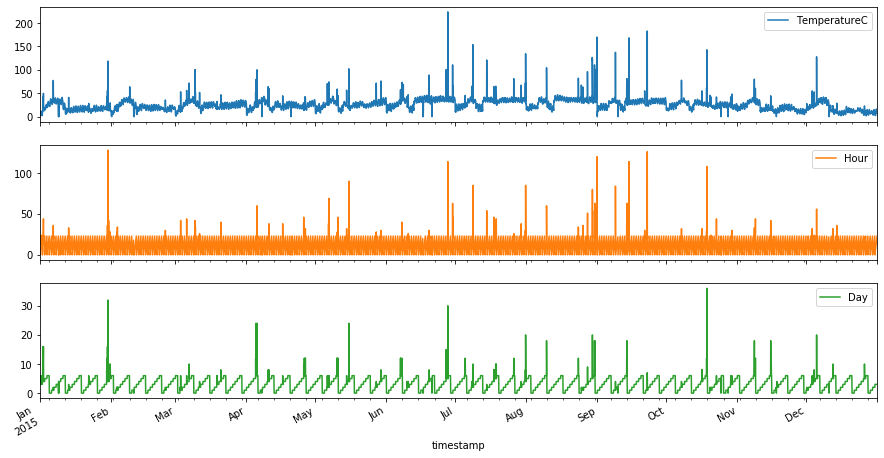

In [22]:
# YOUR CODE HERE -- you can use the comments below as a guide to help you stage the parts of the solution
# Lets plot the pre-processed data 

df3.plot(subplots = True, figsize=(15,8));

In [23]:
# YOUR CODE HERE -- you can use the comments below as a guide to help you stage the parts of the solution
# lets extract hour of the day and dayofweek for each data item -- add them in a separate columns -- 
# you can call these new columns "H" and "D" if you want the result to look like the Hint 4


**Hint4**: The result should look like this:

| timestamp           |   TemperatureC |   H |   D |
|:--------------------|---------------:|----:|----:|
| 2015-01-01 00:00:00 |            2.8 |   0 |   3 |
| 2015-01-01 01:00:00 |            2.9 |   1 |   3 |
| 2015-01-01 02:00:00 |            2.8 |   2 |   3 |
| 2015-01-01 03:00:00 |            2.2 |   3 |   3 |
| 2015-01-01 04:00:00 |            2.2 |   4 |   3 |


**Now lets encode the H and D columns of this DataFrame in a new DataFrame called `feature_dataset`**

**Hint5**: to dummify specific columns use the keyword `columns=['col1','col2',...]` while using [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [24]:
# YOUR CODE HERE -- you can use the comments below as a guide to help you stage the parts of the solution
# Now lets encode the H and D columns in a new DataFrame called feature_dataset

feature_dataset = pd.get_dummies(data=df3, columns=['Hour','Day'], drop_first=True)


In [25]:
feature_dataset

,TemperatureC,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Day_10,Day_12,Day_15,Day_16,Day_18,Day_20,Day_24,Day_30,Day_32,Day_36
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,2.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00,5.8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00,2.8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00,2.2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 04:00:00,2.2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,12.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-12-31 20:00:00,11.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-12-31 21:00:00,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
feature_dataset.shape

(8760, 75)

## Exercise 05.2.2 - Forecasting Energy Consumption
**Energy forecasting**

Energy forecasting is used for efficient operation and management of building energy as well as cost effective purchase of electricity amongst other applications. 

Now let's apply this concept on the "Office_Autumn.csv" file. We will develop a medium-term electrical load forecasting (MTELF) that can accurately forecast next month's energy consumption based on the last three months. 

1. Load the metered data of the building `Office Autumn.csv`.
2. Write a function `runTheModel` in which the inputs are the features_dataset, the target_dataset, training months, and testing months, and the output is a dataframe of the KneighborRegressor Machine learning prediction `Actual v.s. Predicted`. Train the model on April, May and June, and Test the data on July.

**Hint1**: The forecasting model structure will be as follows:


Features | Target
--- | ---
`TemperatureC` (float) <br><br>`H` (dummy variable) <br><br>`D` (dummy variable)| Energy consumption


**Note:** This function will be used in the following exercise.


In [27]:
# YOUR CODE HERE -- you can use the comments below as a guide to help you stage the parts of the solution
#Load the Office Autumn.csv dataframe as target_dataset

#Resample and fill gaps as done in the previous exercise.

In [28]:
df4 = pd.read_csv("Office_Autumn.csv", parse_dates=['timestamp'],index_col=['timestamp'] )

In [29]:
df4

,Office_Autumn
timestamp,
2015-01-01 00:00:00,160.15
2015-01-01 01:00:00,162.95
2015-01-01 02:00:00,157.14
2015-01-01 03:00:00,266.57
2015-01-01 04:00:00,278.86
...,...
2015-12-31 19:00:00,171.21
2015-12-31 20:00:00,175.82
2015-12-31 21:00:00,47.28


In [30]:
df4.shape

(8760, 1)

In [31]:
df5 = pd.concat([feature_dataset,df4], axis=1)

In [32]:
df5

,TemperatureC,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Day_12,Day_15,Day_16,Day_18,Day_20,Day_24,Day_30,Day_32,Day_36,Office_Autumn
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,2.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,160.15
2015-01-01 01:00:00,5.8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,162.95
2015-01-01 02:00:00,2.8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,157.14
2015-01-01 03:00:00,2.2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,266.57
2015-01-01 04:00:00,2.2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,278.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,12.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,171.21
2015-12-31 20:00:00,11.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,175.82
2015-12-31 21:00:00,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,47.28


In [33]:
df5.shape

(8760, 76)

In [34]:
X = df5.iloc[:,0:75]
y = df5.iloc[:,75]

In [35]:
X

,TemperatureC,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Day_10,Day_12,Day_15,Day_16,Day_18,Day_20,Day_24,Day_30,Day_32,Day_36
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,2.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00,5.8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00,2.8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00,2.2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 04:00:00,2.2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,12.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-12-31 20:00:00,11.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-12-31 21:00:00,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y

timestamp
2015-01-01 00:00:00    160.15
2015-01-01 01:00:00    162.95
2015-01-01 02:00:00    157.14
2015-01-01 03:00:00    266.57
2015-01-01 04:00:00    278.86
                        ...  
2015-12-31 19:00:00    171.21
2015-12-31 20:00:00    175.82
2015-12-31 21:00:00     47.28
2015-12-31 22:00:00    187.35
2015-12-31 23:00:00    191.62
Freq: H, Name: Office_Autumn, Length: 8760, dtype: float64

In [37]:
X.values, y.values

(array([[ 2.8,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 5.8,  0. ,  1. , ...,  0. ,  0. ,  0. ],
        [ 2.8,  0. ,  1. , ...,  0. ,  0. ,  0. ],
        ...,
        [10. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 9.4,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 7.2,  0. ,  0. , ...,  0. ,  0. ,  0. ]]),
 array([160.15, 162.95, 157.14, ...,  47.28, 187.35, 191.62]))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [39]:
X_train.shape, X_test.shape

((7008, 75), (1752, 75))

In [40]:
model = KNeighborsRegressor()

In [41]:
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred

array([118.538 ,  90.668 , 117.514 , ..., 107.106 , 123.419 , 156.1975])

In [44]:
y_test

array([131.88,  93.96, 112.03, ...,  83.2 , 124.99, 138.93])

In [45]:
y_pred.shape

(1752,)

In [46]:
y_test.shape

(1752,)

In [47]:
predict = pd.DataFrame(y_pred, columns=['Prediction'])

In [48]:
predict

,Prediction
0,118.5380
1,90.6680
2,117.5140
3,132.1080
4,159.2340
...,...
1747,193.5160
1748,221.8380
1749,107.1060
1750,123.4190


In [49]:
actual = pd.DataFrame(y_test, columns=['Actual'])

In [50]:
actual

,Actual
0,131.88
1,93.96
2,112.03
3,120.21
4,122.94
...,...
1747,182.08
1748,214.71
1749,83.20
1750,124.99


In [51]:
compare = pd.concat([actual,predict],axis=1)

In [52]:
compare

,Actual,Prediction
0,131.88,118.5380
1,93.96,90.6680
2,112.03,117.5140
3,120.21,132.1080
4,122.94,159.2340
...,...,...
1747,182.08,193.5160
1748,214.71,221.8380
1749,83.20,107.1060
1750,124.99,123.4190


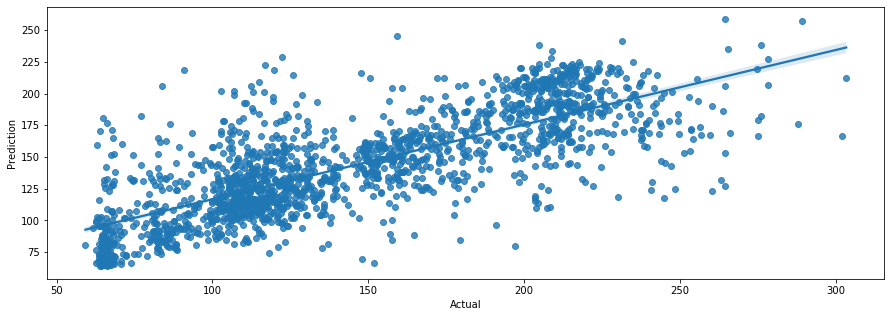

In [53]:
plt.figure(figsize=(15,5))
sns.regplot(x='Actual',y='Prediction',data=compare)
plt.show()

In [54]:
mse = mean_squared_error(y_test,y_pred)

In [55]:
mse

1145.3611473563071

In [56]:
rmse = np.sqrt(mse)

In [57]:
rmse

33.84318465151155

In [58]:
r2score = r2_score(y_test,y_pred)

In [59]:
r2score

0.5914933129185278

## Exercise 05.2.3 - Prediction Post-Processing and Visualization - Advanced (Optional)

We often run machine learning models multiple times in different ways and calculate their success based on an error metric. In this advanced exercise, you can use the function created to run the model three times with different parameters each time. 

Using the previous function, we need to do 3 cycles of predicton and report the [Mean Absolute Percentage Error (MAPE)](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) of each cycle. 

<center><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/961e2d315e7269f820104c7b4b422f840104be2c"><br>
Where $At$ is the actual value and $Ft$ is the forecast value
</center>

Now, it is the time to use ML to predict three cycles of energy forecast months as follwos:
1. cycle1: train_months = [1,2,3] , test_month = [4]
2. cycle2: train_months = [4,5,6] , test_month = [7]
3. cycle3: train_months = [7,8,9] , test_month = [10]

**The expected outputs:**
1. Use the regression model function to forcast the test_month out of the 3 previous train_monts. 
2. Plot each result.
3. Plot the Mean Absolute Percentage Error (MAPE) of each cycle. 

In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
mean_absolute_percentage_error(y_test,y_pred)

17.982220925676163

In [62]:
# YOUR CODE HERE -- you can use the comments below as a guide to help you stage the parts of the solution
#Now lets plot the Mean Absolute Percentage Error MAPE.
